In [1]:
# import

import pandas as pd
import numpy as np

In [2]:
pd.__version__

'1.1.3'

********************
## 目录

**一、索引器**

* 1.1 表的列索引
* 1.2 序列的行索引
* 1.3 .loc 索引 和 iloc 索引
* 1.4 .query 字符串形式的索引
* 1.5 随机抽样

**二、多级索引**

* 2.1 多级索引及其表的结构
* 2.2 多级索引中的loc索引器
* 2.3 IndexSlice对象
* 2.4 多级索引的构造


**三、索引的常用方法**

* 3.1  索引层的交换和删除
* 3.2. 索引属性的修改
* 3.3  索引的设置与重置
* 3.4  索引的变形


**四、索引运算**

* 4.1. 集合的运算法则
* 4.2. 一般的索引运算


**五、练习**

* Ex1：公司员工数据集
* Ex2：巧克力数据集

*********************
## 下面是正式的学习内容

In [30]:
df = pd.read_csv("../data/learn_pandas.csv",usecols=['School', 'Grade', 'Name', 'Gender', 'Weight', 'Transfer'])
df.head()

,School,Grade,Name,Gender,Weight,Transfer
0,Shanghai Jiao Tong University,Freshman,Gaopeng Yang,Female,46.0,N
1,Peking University,Freshman,Changqiang You,Male,70.0,N
2,Shanghai Jiao Tong University,Senior,Mei Sun,Male,89.0,N
3,Fudan University,Sophomore,Xiaojuan Sun,Female,41.0,N
4,Fudan University,Sophomore,Gaojuan You,Male,74.0,N


### 一、索引器

#### 1.1 表的列索引

* 取出单列 
* 取出多列

In [4]:
# 取出单列 
df['School'].head()

0    Shanghai Jiao Tong University
1                Peking University
2    Shanghai Jiao Tong University
3                 Fudan University
4                 Fudan University
Name: School, dtype: object

In [5]:
# 取出单列 列名不包含空格
df.School.head()

0    Shanghai Jiao Tong University
1                Peking University
2    Shanghai Jiao Tong University
3                 Fudan University
4                 Fudan University
Name: School, dtype: object

In [6]:
# 取出多列

df[["School","Grade"]].head()

,School,Grade
0,Shanghai Jiao Tong University,Freshman
1,Peking University,Freshman
2,Shanghai Jiao Tong University,Senior
3,Fudan University,Sophomore
4,Fudan University,Sophomore


#### 1.2 序列的行索引

序列也就是我们说的一维的Series，一维Series行索引可以通过**行的索引值**，二维数据DataFrame行索引可以通过**loc或者iloc函数**进行索引

In [9]:
# 序列行索引

s = pd.Series(data=["Jack","Rose","Mike","John"],index = ["a","b","c","d"])
s

a    Jack
b    Rose
c    Mike
d    John
dtype: object

In [10]:
s['a']

'Jack'

In [22]:
# 序列切片行索引

s['c':'a':-1]

c    Mike
b    Rose
a    Jack
dtype: object

In [3]:
# 列表行索引
df_school = df.set_index('School')
df_school.loc["Shanghai Jiao Tong University"].head()

,Grade,Name,Gender,Weight,Transfer
School,,,,,
Shanghai Jiao Tong University,Freshman,Gaopeng Yang,Female,46.0,N
Shanghai Jiao Tong University,Senior,Mei Sun,Male,89.0,N
Shanghai Jiao Tong University,Freshman,Qiang Chu,Female,52.0,N
Shanghai Jiao Tong University,Freshman,Xiaopeng Zhou,Male,74.0,N
Shanghai Jiao Tong University,Senior,Peng You,Female,48.0,NaN


In [6]:
# 列表行索引
df.iloc[[0,1,3]] 

,School,Grade,Name,Gender,Weight,Transfer
0,Shanghai Jiao Tong University,Freshman,Gaopeng Yang,Female,46.0,N
1,Peking University,Freshman,Changqiang You,Male,70.0,N
3,Fudan University,Sophomore,Xiaojuan Sun,Female,41.0,N


#### 1.3 .loc 索引 和 iloc 索引


数据的索引方式除了利用列名之外，还可以利用  **.loc 基于元素索引**（即行的index名称和列的index名称） 和 **.iloc 基于位置索引**(即行的位置和列的位置)

* **.loc索引**
  + .loc[ * , * ],第一个 * 表示行的选择方式， 第二个 * 表示列的选择方式 ，只有一个* 表示只对行进行选择
  +  " * " 的表示方法有 **单个元素、元素列表、元素切片、布尔列表以及函数**
  
  
* **.iloc索引**
  + .iloc[ * , * ],第一个 * 表示行的选择方式， 第二个 * 表示列的选择方式 ，只有一个* 表示只对行进行选择
  +  " * " 的表示方法有 **整数、整数列表、整数切片、布尔列表以及函数**

In [31]:
# 
df_demo = df.set_index("Name")
df_demo.head()

,School,Grade,Gender,Weight,Transfer
Name,,,,,
Gaopeng Yang,Shanghai Jiao Tong University,Freshman,Female,46.0,N
Changqiang You,Peking University,Freshman,Male,70.0,N
Mei Sun,Shanghai Jiao Tong University,Senior,Male,89.0,N
Xiaojuan Sun,Fudan University,Sophomore,Female,41.0,N
Gaojuan You,Fudan University,Sophomore,Male,74.0,N


In [29]:
# * 为单个元素
df_demo.loc["Gaopeng Yang"]

School      Shanghai Jiao Tong University
Grade                            Freshman
Gender                             Female
Weight                                 46
Transfer                                N
Name: Gaopeng Yang, dtype: object

In [31]:
df_demo.loc["Mei Sun"]

,School,Grade,Gender,Weight,Transfer
Name,,,,,
Mei Sun,Shanghai Jiao Tong University,Senior,Male,89.0,N
Mei Sun,Shanghai Jiao Tong University,Junior,Female,50.0,N


In [32]:
df_demo.loc["Gaopeng Yang","Gender"]

'Female'

In [10]:
# * 为元素列表

df_demo.loc[["Gaopeng Yang","Mei Sun"],['School','Gender']]

,School,Gender
Name,,
Gaopeng Yang,Shanghai Jiao Tong University,Female
Mei Sun,Shanghai Jiao Tong University,Male
Mei Sun,Shanghai Jiao Tong University,Female


切片索引要注意的值，起始点应该为唯一值

In [16]:
# * 为切片 

df_demo.loc['Gaopeng Yang':'Gaojuan You','School':'Gender']

,School,Grade,Gender
Name,,,
Gaopeng Yang,Shanghai Jiao Tong University,Freshman,Female
Changqiang You,Peking University,Freshman,Male
Mei Sun,Shanghai Jiao Tong University,Senior,Male
Xiaojuan Sun,Fudan University,Sophomore,Female
Gaojuan You,Fudan University,Sophomore,Male


布尔列表索引，其实就是通过条件得到一个布尔值的列表

In [21]:
# * 为布尔列表

df_demo.loc[df_demo.Grade =="Freshman"].head()

,School,Grade,Gender,Weight,Transfer
Name,,,,,
Gaopeng Yang,Shanghai Jiao Tong University,Freshman,Female,46.0,N
Changqiang You,Peking University,Freshman,Male,70.0,N
Xiaoli Qian,Tsinghua University,Freshman,Female,51.0,N
Qiang Chu,Shanghai Jiao Tong University,Freshman,Female,52.0,N
Changli Zhang,Tsinghua University,Freshman,Female,48.0,N


In [22]:
# * 为布尔列表 利用isin


df_demo.loc[df_demo.School.isin(["Peking University","Shanghai Jiao Tong University"])].head()

,School,Grade,Gender,Weight,Transfer
Name,,,,,
Gaopeng Yang,Shanghai Jiao Tong University,Freshman,Female,46.0,N
Changqiang You,Peking University,Freshman,Male,70.0,N
Mei Sun,Shanghai Jiao Tong University,Senior,Male,89.0,N
Qiang Chu,Shanghai Jiao Tong University,Freshman,Female,52.0,N
Juan Xu,Peking University,Junior,Female,NaN,N


对于一些其他的复合条件，可以通过**逻辑计算（且）&、（或）|、（取反）~**将其组合起来，
下面举例 取例如选出**复旦大学中体重超过70kg的大四学生**

In [24]:
condition1 = df_demo["School"]=="Fudan University"
condition2 = df_demo["Weight"]<70
condition3 = df_demo["Grade"]=="Junior"

df_demo.loc[condition1 & condition3 & (~condition2)]

,School,Grade,Gender,Weight,Transfer
Name,,,,,
Chunqiang Chu,Fudan University,Junior,Male,72.0,N
Changfeng Lv,Fudan University,Junior,Male,76.0,N


【练一练】
使用loc实现df.select_dtypes()功能

* **df.select_dtypes(include=None, exclude=None)** 选择某个数据类型的特征

    可选的数据类型：
    
    *  数字类型np.number('number')
    *  字符串object dtype（np.object 或者是 'object'）
    *  日期时间np.datetime64,'datetime'或’datetime64‘
    *  要选择timedeltas，使用np.timedelta64，'timedelta'或 'timedelta64' 



In [40]:
# 选择数字类型

condition =  df_demo.dtypes==np.number
df_demo.loc[:,condition].head()

,Weight
Name,
Gaopeng Yang,46.0
Changqiang You,70.0
Mei Sun,89.0
Xiaojuan Sun,41.0
Gaojuan You,74.0


如果用函数来返回索引条件的话，要满足**1、函数输入参数是DataFrame;2、输出为 单个元素、元素列表、元素切片**

In [41]:
# * 是函数

def condition(x):
    condition1 = x["School"]=="Fudan University"
    condition2 = x["Weight"]<70
    condition3 = x["Grade"]=="Junior"
    
    return condition1 & condition3 & (~condition2)

df_demo.loc[condition]

,School,Grade,Gender,Weight,Transfer
Name,,,,,
Chunqiang Chu,Fudan University,Junior,Male,72.0,N
Changfeng Lv,Fudan University,Junior,Male,76.0,N


【WARNING】？？链式赋值？？

In [43]:
df_chain = pd.DataFrame([[0,0],[0,1],[1,0],[-1,0]],columns=list("ab"))
df_chain

,a,b
0,0,0
1,0,1
2,1,0
3,-1,0


In [47]:
# 错误的方式
df_chain.loc[df_chain['a']!=0].b =1
df_chain

,a,b
0,0,0
1,0,1
2,1,0
3,-1,0


In [49]:
# 正确的方式
df_chain.loc[df_chain['a']!=0,'b']=1
df_chain

,a,b
0,0,0
1,0,1
2,1,1
3,-1,1


df.iloc的使用方法与df.loc的使用方法类似，这里就不作赘述，唯一不同的就是**iloc使用的位置索引**即index location

In [ ]:
df_demo.iloc[s]

In [7]:
type(df_demo['Weight']>60.0)

pandas.core.series.Series

In [6]:
type((df_demo['Weight']>60.0).values)

numpy.ndarray

In [24]:
df_demo.iloc[(df_demo['Weight']>60.0).values].head()

,School,Grade,Gender,Weight,Transfer
Name,,,,,
Changqiang You,Peking University,Freshman,Male,70.0,N
Mei Sun,Shanghai Jiao Tong University,Senior,Male,89.0,N
Gaojuan You,Fudan University,Sophomore,Male,74.0,N
Xiaopeng Zhou,Shanghai Jiao Tong University,Freshman,Male,74.0,N
Xiaoqiang Qin,Tsinghua University,Junior,Male,68.0,N


#### 1.4 .query 字符串形式的索引

query是通过将字符串查询的方式传入查找，表达式返回布尔列表
 
* df.query(expr, inplace=False, **kwargs)

还是以**复旦大学中体重超过70kg的大四学生**为例

In [25]:
df_demo.query("(School=='Fudan University')&(Grade=='Senior')&(~(Weight<70))")

,School,Grade,Gender,Weight,Transfer
Name,,,,,
Chengpeng Zhou,Fudan University,Senior,Male,81.0,N
Chengpeng Qian,Fudan University,Senior,Male,73.0,Y


**【列名带有空格】** 可以使用反引号，键盘上这个~下面的那个符号`

In [20]:
s = pd.DataFrame(data = {'a a':[1,2,3],'b':['a','b','c']},)
s

,a a,b
0,1,a
1,2,b
2,3,c


In [24]:
s.query("`a a`==1")

,a a,b
0,1,a


**【query的其他应用】** query中 不仅注册了DataFrame中的列名，还注册了若干英语的字面用法例如： or、in、not in、and

例如筛选出 男生中不是大一大二的学生

In [35]:
df_demo.query("(Grade  not in ['Freshman','Sophomore']) and (Gender == 'Male')").head()

,School,Grade,Gender,Weight,Transfer
Name,,,,,
Changqiang You,Peking University,Freshman,Male,70.0,N
Gaojuan You,Fudan University,Sophomore,Male,74.0,N
Xiaopeng Zhou,Shanghai Jiao Tong University,Freshman,Male,74.0,N
Gaoli Zhao,Peking University,Freshman,Male,78.0,N
Xiaojuan Qin,Peking University,Freshman,Male,79.0,Y


可以通过使用 engine='python'改变传入的字符串参数形式，这样就可以使用pandas中自带的函数，但是不推荐这么使用，效率低下（官方说的）

In [43]:
df_demo.query("(Grade.isin(['Freshman','Sophomore'])) and (Gender == 'Male')",engine='python').head()

,School,Grade,Gender,Weight,Transfer
Name,,,,,
Changqiang You,Peking University,Freshman,Male,70.0,N
Gaojuan You,Fudan University,Sophomore,Male,74.0,N
Xiaopeng Zhou,Shanghai Jiao Tong University,Freshman,Male,74.0,N
Gaoli Zhao,Peking University,Freshman,Male,78.0,N
Xiaojuan Qin,Peking University,Freshman,Male,79.0,Y


**【query引入外部变量】**  query可以通过@变量名引入外部变量

例如取出体重在70和80之间的男生

In [49]:
weight1 = 70.0
weight2 = 80.0

df_demo.query("Weight.between(@weight1,@weight2)",engine='python').head()

,School,Grade,Gender,Weight,Transfer
Name,,,,,
Changqiang You,Peking University,Freshman,Male,70.0,N
Gaojuan You,Fudan University,Sophomore,Male,74.0,N
Xiaopeng Zhou,Shanghai Jiao Tong University,Freshman,Male,74.0,N
Xiaofeng Sun,Tsinghua University,Senior,Male,71.0,N
Gaoli Zhao,Peking University,Freshman,Male,78.0,N


#### 1.5 随机抽样

如果把DataFrame的每一行看作一个样本，或把每一列看作一个特征，再把整个DataFrame看作总体，想要对样本或特征进行随机抽样就可以用sample函数。

* df_demo.sample(n=None,frac=None,replace=False,weights=None,random_state=None,axis=None,)
    * 参数说明:
    * n :返回数据的个数
    * frac ： 返回数据的比例，float，不能和n同时使用，默认None
    * axis ： 指定维度方向
    * replace ： 是否又放回抽样
    * weights ： 每个样本抽样的概率
    
例如，对下面构造的df_sample以value值的相对大小为抽样概率进行有放回抽样，抽样数量为3。

In [50]:
df_sample = pd.DataFrame({'id': list('abcde'), 'value': [1, 2, 3, 4, 90]})
df_sample

,id,value
0,a,1
1,b,2
2,c,3
3,d,4
4,e,90


In [53]:
df_sample.sample(3,replace=True,weights=df_sample['value'].values)

,id,value
4,e,90
4,e,90
4,e,90


### 二、多级索引**

新构造一张具有多级索引的表结构，

In [58]:
np.random.seed(2020)
multi_index = pd.MultiIndex.from_product([list('ABCD'), df.Gender.unique()], names=('School', 'Gender'))
multi_column = pd.MultiIndex.from_product([['Height', 'Weight'], df.Grade.unique()], names=('Indicator', 'Grade'))
df_multi = pd.DataFrame(np.c_[(np.random.randn(8,4)*5 + 163).tolist(), (np.random.randn(8,4)*5 + 65).tolist()],
                        index = multi_index, columns = multi_column).round(1)
df_multi

Indicator       Height                           Weight                   \
Grade         Freshman Senior Sophomore Junior Freshman Senior Sophomore   
School Gender                                                              
A      Female    154.2  163.4     157.3  159.7     66.7   63.5      71.2   
       Male      158.5  156.6     162.7  163.3     65.8   65.5      69.2   
B      Female    165.1  160.1     159.0  169.6     63.4   58.4      56.2   
       Male      169.4  156.9     164.6  155.8     58.2   67.4      64.0   
C      Female    161.2  159.2     165.0  163.3     68.5   65.5      68.1   
       Male      173.4  163.2     162.8  160.4     75.2   62.6      66.0   
D      Female    162.6  156.9     155.9  155.6     62.6   64.9      67.3   
       Male      164.9  167.7     171.9  167.4     61.8   62.3      64.2   

Indicator             
Grade         Junior  
School Gender         
A      Female   63.9  
       Male     75.2  
B      Female   65.5  
       Male     64.5  
C      Female   69.8  
       Male     73.2  
D      Female   66.4  
       Male     65.2

#### 2.1 多级索引及其表的结构

多级索引的表格，可以理解为有一级目录和二级目录，此时我们要利用行的名称进行索引时就需要通过**元组（"A"，"Female"）**,列索引也是一样的，要通过元组形式进行索引**（'Height','Freshman'）**

具体可以参照下图理解（图片来源Datewhale学习教程）

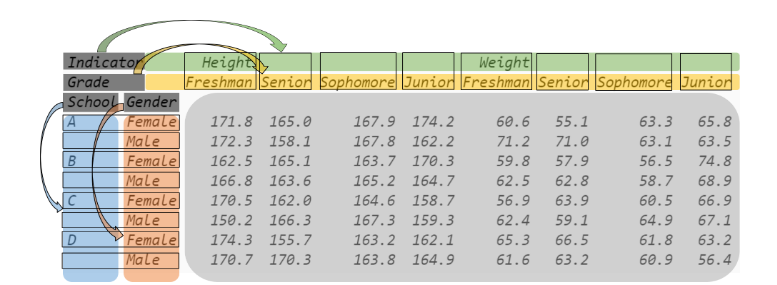



In [63]:
# 行索引名称names和值values

df_multi.index

MultiIndex([('A', 'Female'),
            ('A',   'Male'),
            ('B', 'Female'),
            ('B',   'Male'),
            ('C', 'Female'),
            ('C',   'Male'),
            ('D', 'Female'),
            ('D',   'Male')],
           names=['School', 'Gender'])

In [62]:
df_multi.index.names

FrozenList(['School', 'Gender'])

In [64]:
df_multi.index.values

array([('A', 'Female'), ('A', 'Male'), ('B', 'Female'), ('B', 'Male'),
       ('C', 'Female'), ('C', 'Male'), ('D', 'Female'), ('D', 'Male')],
      dtype=object)

In [ ]:
# 列索引的名称name和值values

In [65]:
df_multi.columns

MultiIndex([('Height',  'Freshman'),
            ('Height',    'Senior'),
            ('Height', 'Sophomore'),
            ('Height',    'Junior'),
            ('Weight',  'Freshman'),
            ('Weight',    'Senior'),
            ('Weight', 'Sophomore'),
            ('Weight',    'Junior')],
           names=['Indicator', 'Grade'])

In [66]:
df_multi.columns.names

FrozenList(['Indicator', 'Grade'])

In [67]:
df_multi.columns.values

array([('Height', 'Freshman'), ('Height', 'Senior'),
       ('Height', 'Sophomore'), ('Height', 'Junior'),
       ('Weight', 'Freshman'), ('Weight', 'Senior'),
       ('Weight', 'Sophomore'), ('Weight', 'Junior')], dtype=object)

In [70]:
# 获得某一层的索引名称
df_multi.index.get_level_values(1)

Index(['Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male'], dtype='object', name='Gender')

#### 2.2 多级索引中的loc索引器

* 多级索引的通用用法： 和单级索引的使用方法一样，只不过把 索引的形式换为元组
* 多级索引的特殊用法： 可以对多层的元素进行交叉组合,具体使用方法看示例

In [74]:
# data

df_multi = df.set_index(['School','Grade'])
df_sorted = df_multi.sort_index() # 排下序
df_sorted.head()

Name  Gender  Weight Transfer
School           Grade                                             
Fudan University Freshman  Changqiang Yang  Female    49.0        N
                 Freshman     Gaoqiang Qin  Female    63.0        N
                 Freshman     Gaofeng Zhao  Female    43.0        N
                 Freshman     Yanquan Wang  Female    55.0        N
                 Freshman        Feng Wang    Male    74.0        N

In [89]:
# 列表
df_sorted.loc[("Fudan University","Freshman"):("Fudan University","Junior"),"Name":"Gender"].head(15)

Name  Gender
School           Grade                            
Fudan University Freshman  Changqiang Yang  Female
                 Freshman     Gaoqiang Qin  Female
                 Freshman     Gaofeng Zhao  Female
                 Freshman     Yanquan Wang  Female
                 Freshman        Feng Wang    Male
                 Freshman        Qiang Shi  Female
                 Freshman      Yanqiang Xu  Female
                 Freshman        Xiaoli Lv  Female
                 Freshman     Yanjuan Zhao  Female
                 Junior          Yanli You  Female
                 Junior      Chunqiang Chu    Male
                 Junior       Changfeng Lv    Male
                 Junior         Yanjuan Lv  Female
                 Junior      Gaoqiang Zhou  Female
                 Junior      Xiaojuan Zhao  Female

In [87]:
# 布尔索引

df_sorted.loc[df_sorted['Weight']>70].head()

Name Gender  Weight Transfer
School           Grade                                           
Fudan University Freshman       Feng Wang   Male    74.0        N
                 Junior     Chunqiang Chu   Male    72.0        N
                 Junior      Changfeng Lv   Male    76.0        N
                 Senior    Chengpeng Zhou   Male    81.0        N
                 Senior    Chengpeng Qian   Male    73.0        Y

**【切片索引】**切片索引要注意的起始点唯一以及起始点的顺序

**【多级索引的交叉组合】** 以 取**所有北大和复旦的大二大三学生**为例，

一般情况下的元组索引写为[（level_0_values1,level_1_values1）,(level_0_values2,level_1_values2)] 

即[('北大','大二'),('北大','大三'),('复旦','大二'),('复旦','大三')]

交叉组合可以写做(level_0_list,level_1_list) 即 (['北大', '复旦'], ['大二', '大三'])

In [91]:
# 
df_sorted.loc[[('Peking University','Sophomore'),
               ('Peking University','Junior'),
               ('Fudan University','Sophomore'),
               ('Fudan University','Junior')]
             ].head(5)

Name  Gender  Weight Transfer
School            Grade                                           
Peking University Sophomore   Changmei Xu  Female    43.0        N
                  Sophomore  Xiaopeng Qin    Male     NaN        N
                  Sophomore        Mei Xu  Female    39.0        N
                  Sophomore   Xiaoli Zhou  Female    55.0        N
                  Sophomore      Peng Han  Female    34.0      NaN

In [102]:
# 
df_sorted.loc[(['Peking University', 'Fudan University'], ['Sophomore', 'Junior']),:].head()

Name  Gender  Weight Transfer
School            Grade                                           
Peking University Sophomore   Changmei Xu  Female    43.0        N
                  Sophomore  Xiaopeng Qin    Male     NaN        N
                  Sophomore        Mei Xu  Female    39.0        N
                  Sophomore   Xiaoli Zhou  Female    55.0        N
                  Sophomore      Peng Han  Female    34.0      NaN


#### 2.3 IndexSlice对象

IndexSlice，创建对象以更轻松地执行multi-index切片，解决：

* 切片和布尔列表混合使用


Slice对象一共有两种形式，第一种为loc[idx[*,*]]型，第二种为loc[idx[*,*],idx[*,*]]型。

首先，创建一个**索引不重复的DataFrame**以及 **slice对象**


In [108]:
#创建slice对象
idx = pd.IndexSlice

# 创建数据集

row1,row2 = list('ABC'),list('abc')
col1,col2 = list('DEF'),list('def')

mul_row_index = pd.MultiIndex.from_product([row1,row2],names=('Upper','Lower')) #从列表的笛卡尔积创建多级列表
mul_col_index = pd.MultiIndex.from_product([col1,col2],names=('Big','Small'))

df_ex = pd.DataFrame(data=np.random.randint(-5,5,(9,9)),index=mul_row_index,columns=mul_col_index)
df_ex.head(10)

Big          D        E        F      
Small        d  e  f  d  e  f  d  e  f
Upper Lower                           
A     a      4 -4 -5 -1  1 -3 -1  0 -5
      b     -5 -4 -4 -3 -5  3 -4 -5 -5
      c      1  3 -4  3  1  1  1  2 -4
B     a      2  4  4  4 -5  1  1 -2  2
      b     -5 -3 -4 -1 -3 -3 -4  4  3
      c      3 -5  3 -5 -2  1 -2  4  4
C     a     -3  2 -3  0  1  0 -4 -4 -4
      b     -4 -3  3  3  0  1  3  0  1
      c      3  0 -2  4 -2  1 -3 -2 -4

【a】loc[idx[*,*]]型

这种情况并不能进行多层（这里的多层指的是多级切片）分别切片，

前一个*表示行的选择，后一个*表示列的选择，与单纯的loc是类似的

In [110]:
df_ex.loc[idx['B':,('D','d'):('E','e')]]

Big          D        E   
Small        d  e  f  d  e
Upper Lower               
B     a      2  4  4  4 -5
      b     -5 -3 -4 -1 -3
      c      3 -5  3 -5 -2
C     a     -3  2 -3  0  1
      b     -4 -3  3  3  0
      c      3  0 -2  4 -2

**【b】loc[idx[ * , * ],idx[ * , * ]]型**

第一个idx[ * , * ]表示行的索引，其中第一个* 表示第一层行索引的选择，第二个* 表示第二层行索引的选择

第二个idx[ * , * ]表示列的索引，其中第一个* 表示第一层列的选择，第二个* 表示 第二层列的选择

In [111]:
df_ex.loc[idx['A','b':],idx['D':,'e']]

Big          D  E  F
Small        e  e  e
Upper Lower         
A     b     -4 -5 -5
      c      3  1  2

#### 2.4 多级索引的构造

创建多级索引的方式有：


* **pd.MultiIndex.from_tuples** : 从元组tuples返回索引
* **pd.MultiIndex.from_arrays** : 从arrays数组结构返回索引 
* **pd.MultiIndex.from_product** : 笛卡尔积返回mul索引

In [129]:
# from_tuples
classes = [('A','x1'),('A','x2'),('B','y1'),('B','y2')]
m_index1=pd.MultiIndex.from_tuples(classes,names=["class1","class2"])
m_index1

MultiIndex([('A', 'x1'),
            ('A', 'x2'),
            ('B', 'y1'),
            ('B', 'y2')],
           names=['class1', 'class2'])

In [124]:
# from_arrays
class1=["A","A","B","B"]
class2=["x1","x2","y1","y2"]
m_index2=pd.MultiIndex.from_arrays([class1,class2],names=["class1","class2"])
m_index2

MultiIndex([('A', 'x1'),
            ('A', 'x2'),
            ('B', 'y1'),
            ('B', 'y2')],
           names=['class1', 'class2'])

In [130]:
# from_product
class1=["A","B"]
class2=["x1","x2"]
m_index3=pd.MultiIndex.from_product([class1,class2],names=["class1","class2"])
m_index3

MultiIndex([('A', 'x1'),
            ('A', 'x2'),
            ('B', 'x1'),
            ('B', 'x2')],
           names=['class1', 'class2'])

### 三、索引的常用方法



In [133]:
# 创建三级索引的表进行学习

np.random.seed(2020)
L1,L2,L3 = ['A','B'],['a','b'],['alpha','beta']
L4,L5,L6 = ['C','D'],['c','d'],['cat','dog']

mul_row_index = pd.MultiIndex.from_product([L1,L2,L3],names=['Upper', 'Lower','Extra'])
mul_col_index = pd.MultiIndex.from_product([L4,L5,L6],names=['Big', 'Small', 'Other'])

df_ex = pd.DataFrame(data=np.random.randint(-5,5,(8,8)),
                    index=mul_row_index,
                    columns=mul_col_index)
df_ex

Big                 C               D            
Small               c       d       c       d    
Other             cat dog cat dog cat dog cat dog
Upper Lower Extra                                
A     a     alpha  -5   3  -2   1  -2  -2   2   3
            beta   -5  -5   3   4  -2   2  -3  -2
      b     alpha   1   0  -5  -1   3   1  -1  -4
            beta   -4   0   4   0   1   1   1   0
B     a     alpha  -1   1  -1  -3  -2  -1   2  -4
            beta   -1   4  -2  -3  -5   4  -4  -3
      b     alpha   2  -4  -5  -3   3   3   0   1
            beta   -2  -2  -5  -5  -1   1   1   3

#### 3.1  索引层的交换和删除

* **索引的交换:** 
    * swaplevel(i=-2, j=-1, axis=0) 沿axis维度交换第i层和第j层的索引
    * reorder_levels(order, axis=0) 沿axis维度 索引重置order的顺序
* **索引的删除** 
    * dropleve(level, axis=0) 按轴axis删除第level层的索引


In [135]:
# 列索引的第一层和第三层交换
df_ex.swaplevel(i=0,j=2,axis=1).head()

Other             cat dog cat dog cat dog cat dog
Small               c   c   d   d   c   c   d   d
Big                 C   C   C   C   D   D   D   D
Upper Lower Extra                                
A     a     alpha  -5   3  -2   1  -2  -2   2   3
            beta   -5  -5   3   4  -2   2  -3  -2
      b     alpha   1   0  -5  -1   3   1  -1  -4
            beta   -4   0   4   0   1   1   1   0
B     a     alpha  -1   1  -1  -3  -2  -1   2  -4

In [136]:
# 行第二层 第三层交换

df_ex.reorder_levels([0,2,1],axis=0)

Big                 C               D            
Small               c       d       c       d    
Other             cat dog cat dog cat dog cat dog
Upper Extra Lower                                
A     alpha a      -5   3  -2   1  -2  -2   2   3
      beta  a      -5  -5   3   4  -2   2  -3  -2
      alpha b       1   0  -5  -1   3   1  -1  -4
      beta  b      -4   0   4   0   1   1   1   0
B     alpha a      -1   1  -1  -3  -2  -1   2  -4
      beta  a      -1   4  -2  -3  -5   4  -4  -3
      alpha b       2  -4  -5  -3   3   3   0   1
      beta  b      -2  -2  -5  -5  -1   1   1   3

In [137]:
# 删除第1列
df_ex.droplevel(1,axis=1)

Big                 C               D            
Other             cat dog cat dog cat dog cat dog
Upper Lower Extra                                
A     a     alpha  -5   3  -2   1  -2  -2   2   3
            beta   -5  -5   3   4  -2   2  -3  -2
      b     alpha   1   0  -5  -1   3   1  -1  -4
            beta   -4   0   4   0   1   1   1   0
B     a     alpha  -1   1  -1  -3  -2  -1   2  -4
            beta   -1   4  -2  -3  -5   4  -4  -3
      b     alpha   2  -4  -5  -3   3   3   0   1
            beta   -2  -2  -5  -5  -1   1   1   3

#### 3.2. 索引属性的修改

* **索引名称的修改** 
    * rename_axis(mapper=None,xindex=None,columns=None,axis=None,copy=True,inplace=False,)
     重命名行或者列的名称,通常用字典来指定修改的方式
     
* **索引的值的修改** 
    * rename()
    
**【注意】这里一个是对索引名称的改变 即names=['Upper', 'Lower', 'Extra']，一个是对索引值的改变 即 ('A', 'a', 'alpha')**

* **map函数**
    * map是定义在index上的函数，可以灵活的修改索引值

In [157]:
df_ex.index

MultiIndex([('A', 'a', 'alpha'),
            ('A', 'a',  'beta'),
            ('A', 'b', 'alpha'),
            ('A', 'b',  'beta'),
            ('B', 'a', 'alpha'),
            ('B', 'a',  'beta'),
            ('B', 'b', 'alpha'),
            ('B', 'b',  'beta')],
           names=['Upper', 'Lower', 'Extra'])

In [139]:
# rename_axis 
df_ex.rename_axis(index={'Extra':'Change_row'},columns={'Other':'Change_col'})

Big                      C               D            
Small                    c       d       c       d    
Change_col             cat dog cat dog cat dog cat dog
Upper Lower Change_row                                
A     a     alpha       -5   3  -2   1  -2  -2   2   3
            beta        -5  -5   3   4  -2   2  -3  -2
      b     alpha        1   0  -5  -1   3   1  -1  -4
            beta        -4   0   4   0   1   1   1   0
B     a     alpha       -1   1  -1  -3  -2  -1   2  -4
            beta        -1   4  -2  -3  -5   4  -4  -3
      b     alpha        2  -4  -5  -3   3   3   0   1
            beta        -2  -2  -5  -5  -1   1   1   3

In [156]:
# rename
df_ex.rename(index={'a':'aaaa'})

Big                 C               D            
Small               c       d       c       d    
Other             cat dog cat dog cat dog cat dog
Upper Lower Extra                                
A     aaaa  alpha  -5   3  -2   1  -2  -2   2   3
            beta   -5  -5   3   4  -2   2  -3  -2
      b     alpha   1   0  -5  -1   3   1  -1  -4
            beta   -4   0   4   0   1   1   1   0
B     aaaa  alpha  -1   1  -1  -3  -2  -1   2  -4
            beta   -1   4  -2  -3  -5   4  -4  -3
      b     alpha   2  -4  -5  -3   3   3   0   1
            beta   -2  -2  -5  -5  -1   1   1   3

**【练一练】** 尝试在rename_axis中使用函数完成与str.upper(x)

In [159]:
df_ex.rename_axis(index=lambda x: str.upper(x))

Big                 C               D            
Small               c       d       c       d    
Other             cat dog cat dog cat dog cat dog
UPPER LOWER EXTRA                                
A     a     alpha  -5   3  -2   1  -2  -2   2   3
            beta   -5  -5   3   4  -2   2  -3  -2
      b     alpha   1   0  -5  -1   3   1  -1  -4
            beta   -4   0   4   0   1   1   1   0
B     a     alpha  -1   1  -1  -3  -2  -1   2  -4
            beta   -1   4  -2  -3  -5   4  -4  -3
      b     alpha   2  -4  -5  -3   3   3   0   1
            beta   -2  -2  -5  -5  -1   1   1   3

In [162]:
# 整个索引元素的替换 可以用迭代器完成
new_values = iter(list('abcdefgh'))
df_ex.rename(index=lambda x:next(new_values),level=2)

Big                 C               D            
Small               c       d       c       d    
Other             cat dog cat dog cat dog cat dog
Upper Lower Extra                                
A     a     a      -5   3  -2   1  -2  -2   2   3
            b      -5  -5   3   4  -2   2  -3  -2
      b     c       1   0  -5  -1   3   1  -1  -4
            d      -4   0   4   0   1   1   1   0
B     a     e      -1   1  -1  -3  -2  -1   2  -4
            f      -1   4  -2  -3  -5   4  -4  -3
      b     g       2  -4  -5  -3   3   3   0   1
            h      -2  -2  -5  -5  -1   1   1   3

In [165]:
# map 实现大写操作

df_demo = df_ex.copy()
#
new_index=df_ex.index.map(lambda x:(x[0],x[1],str.upper(x[2])))
df_demo.index = new_index
df_demo

Big                 C               D            
Small               c       d       c       d    
Other             cat dog cat dog cat dog cat dog
Upper Lower Extra                                
A     a     ALPHA  -5   3  -2   1  -2  -2   2   3
            BETA   -5  -5   3   4  -2   2  -3  -2
      b     ALPHA   1   0  -5  -1   3   1  -1  -4
            BETA   -4   0   4   0   1   1   1   0
B     a     ALPHA  -1   1  -1  -3  -2  -1   2  -4
            BETA   -1   4  -2  -3  -5   4  -4  -3
      b     ALPHA   2  -4  -5  -3   3   3   0   1
            BETA   -2  -2  -5  -5  -1   1   1   3

In [166]:
# map 实现多级索引的压缩
df_demo = df_ex.copy()

# 
new_index = df_ex.index.map(lambda x:(x[0]+' '+x[1]+' '+ x[2]))
df_demo.index =new_index
df_demo

Big         C               D            
Small       c       d       c       d    
Other     cat dog cat dog cat dog cat dog
A a alpha  -5   3  -2   1  -2  -2   2   3
A a beta   -5  -5   3   4  -2   2  -3  -2
A b alpha   1   0  -5  -1   3   1  -1  -4
A b beta   -4   0   4   0   1   1   1   0
B a alpha  -1   1  -1  -3  -2  -1   2  -4
B a beta   -1   4  -2  -3  -5   4  -4  -3
B b alpha   2  -4  -5  -3   3   3   0   1
B b beta   -2  -2  -5  -5  -1   1   1   3

In [167]:
# map 索引反向展开

new_index = df_demo.index.map(lambda x: tuple(x.split(' ')))
df_demo.index = new_index
df_demo

Big         C               D            
Small       c       d       c       d    
Other     cat dog cat dog cat dog cat dog
A a alpha  -5   3  -2   1  -2  -2   2   3
    beta   -5  -5   3   4  -2   2  -3  -2
  b alpha   1   0  -5  -1   3   1  -1  -4
    beta   -4   0   4   0   1   1   1   0
B a alpha  -1   1  -1  -3  -2  -1   2  -4
    beta   -1   4  -2  -3  -5   4  -4  -3
  b alpha   2  -4  -5  -3   3   3   0   1
    beta   -2  -2  -5  -5  -1   1   1   3

#### 3.3  索引的设置与重置

* **索引的设置** 
    * set_index(keys,drop=True,append=False,inplace=False)
    * 参数说明
    * keys：设为索引的数据
    * drop：drop : bool, default True，是否还在原表中保留该数据
    * append : bool, default False，是否保留原索引
* **索引的重置**
    * reset_index(level:collections.abc.Hashable=None,drop:bool=False,)
    * 可以说是set_index的逆过程，参数定义类似

In [ ]:
df.reset_index()

In [168]:
# 本节数据
df_new = pd.DataFrame({'A':list('aacd'), 'B':list('PQRT'), 'C':[1,2,3,4]})
df_new

,A,B,C
0,a,P,1
1,a,Q,2
2,c,R,3
3,d,T,4


In [171]:
# set_index

df_new.set_index('A',drop=False)

,A,B,C
A,,,
a,a,P,1
a,a,Q,2
c,c,R,3
d,d,T,4


In [172]:
# set_index

df_new.set_index('A',append =True)

,,B,C
,A,,
0,a,P,1
1,a,Q,2
2,c,R,3
3,d,T,4


In [179]:
# set_index 对未出现在列表中的数据 设置index
new_index = pd.Series(list('zwyc'),name='D')
df_new =df_new.set_index([new_index])
df_new

,A,B,C
D,,,
z,a,P,1
w,a,Q,2
y,c,R,3
c,d,T,4


In [180]:
# reset_index

df_new.reset_index(['D'])

,D,A,B,C
0,z,a,P,1
1,w,a,Q,2
2,y,c,R,3
3,c,d,T,4


In [183]:
# reset_index drop=True
df_new.reset_index(['D'],drop=True)

,A,B,C
0,a,P,1
1,a,Q,2
2,c,R,3
3,d,T,4


#### 3.4  索引的变形

* 索引扩充或者删除 df.reindex
* 仿照传入表的索引来修改被调用表索引的变形 df.reindex_like

举例：给出了员工信息，需要重新制作一张新的表，要求增加一名员工的同时去掉身高列并增加性别列：

In [197]:
# 原数据
df_reindex = pd.DataFrame(data={'Weigh':[60,70,80],'Hight':[172,158,185]},
                         index=['1001','1002','1003'])
df_reindex

,Weigh,Hight
1001,60,172
1002,70,158
1003,80,185


In [199]:
#增加一名员工
df_reindex.reindex(index=['1001','1002','1003','1004'],columns=['Weigh','Gender'])


,Weigh,Gender
1001,60.0,NaN
1002,70.0,NaN
1003,80.0,NaN
1004,NaN,NaN


### 四、索引运算
#### 4.1. 集合的运算法则
#### 4.2. 一般的索引运算

### 五、练习

#### Ex1：公司员工数据集


In [53]:
df = pd.read_csv('../data/company.csv')
df.head()

,EmployeeID,birthdate_key,age,city_name,department,job_title,gender
0,1318,1/3/1954,61,Vancouver,Executive,CEO,M
1,1319,1/3/1957,58,Vancouver,Executive,VP Stores,F
2,1320,1/2/1955,60,Vancouver,Executive,Legal Counsel,F
3,1321,1/2/1959,56,Vancouver,Executive,VP Human Resources,M
4,1322,1/9/1958,57,Vancouver,Executive,VP Finance,M


* 1、分别只使用query和loc选出年龄不超过四十岁且工作部门为 Dairy 或 Bakery 的男性。

In [54]:
#  loc
df.loc[(df['age']<=40) & (df['department'].isin(['Dairy','Bakery']))].head()

,EmployeeID,birthdate_key,age,city_name,department,job_title,gender
3608,5788,1/12/1975,40,Chilliwack,Dairy,Dairy Person,F
3609,5789,1/13/1975,40,Chilliwack,Dairy,Dairy Person,F
3610,5790,1/13/1975,40,Kelowna,Dairy,Dairy Person,F
3611,5791,1/14/1975,40,Kelowna,Dairy,Dairy Person,M
3613,5793,1/22/1975,40,Richmond,Bakery,Baker,M


In [55]:
# query

df.query(" age <=40 and  department in ['Dairy','Bakery']").head()

,EmployeeID,birthdate_key,age,city_name,department,job_title,gender
3608,5788,1/12/1975,40,Chilliwack,Dairy,Dairy Person,F
3609,5789,1/13/1975,40,Chilliwack,Dairy,Dairy Person,F
3610,5790,1/13/1975,40,Kelowna,Dairy,Dairy Person,F
3611,5791,1/14/1975,40,Kelowna,Dairy,Dairy Person,M
3613,5793,1/22/1975,40,Richmond,Bakery,Baker,M


2.选出员工ID号 为奇数所在行的第1、第3和倒数第2列。

In [56]:
df.iloc[(df['EmployeeID']%2==1).values,[0,2,-2]].head()

,EmployeeID,age,job_title
1,1319,58,VP Stores
3,1321,56,VP Human Resources
5,1323,53,"Exec Assistant, VP Stores"
6,1325,51,"Exec Assistant, Legal Counsel"
8,1329,48,Store Manager


3、按照以下步骤进行索引操作：
* 把后三列设为索引后交换内外两层
* 恢复中间一层
* 修改外层索引名为Gender
* 用下划线合并两层行索引
* 把行索引拆分为原状态
* 修改索引名为原表名称
* 恢复默认索引并将列保持为原表的相对位置

In [64]:
# 把后三列设为索引后交换内外两层

df_op = df.copy()
df_op = df_op.set_index(['department','job_title','gender'])
df_op = df_op.reorder_levels([2,1,0],axis=0)
df_op.head()

EmployeeID birthdate_key  age  city_name
gender job_title          department                                          
M      CEO                Executive         1318      1/3/1954   61  Vancouver
F      VP Stores          Executive         1319      1/3/1957   58  Vancouver
       Legal Counsel      Executive         1320      1/2/1955   60  Vancouver
M      VP Human Resources Executive         1321      1/2/1959   56  Vancouver
       VP Finance         Executive         1322      1/9/1958   57  Vancouver

In [65]:
# 恢复中间一层
df_op = df_op.reset_index(level=1)
df_op.head()

job_title  EmployeeID birthdate_key  age  \
gender department                                                      
M      Executive                  CEO        1318      1/3/1954   61   
F      Executive            VP Stores        1319      1/3/1957   58   
       Executive        Legal Counsel        1320      1/2/1955   60   
M      Executive   VP Human Resources        1321      1/2/1959   56   
       Executive           VP Finance        1322      1/9/1958   57   

                   city_name  
gender department             
M      Executive   Vancouver  
F      Executive   Vancouver  
       Executive   Vancouver  
M      Executive   Vancouver  
       Executive   Vancouver

In [66]:
#修改外层索引名为Gender 

df_op = df_op.rename_axis(index=['Gender','department'])
df_op.head()

job_title  EmployeeID birthdate_key  age  \
Gender department                                                      
M      Executive                  CEO        1318      1/3/1954   61   
F      Executive            VP Stores        1319      1/3/1957   58   
       Executive        Legal Counsel        1320      1/2/1955   60   
M      Executive   VP Human Resources        1321      1/2/1959   56   
       Executive           VP Finance        1322      1/9/1958   57   

                   city_name  
Gender department             
M      Executive   Vancouver  
F      Executive   Vancouver  
       Executive   Vancouver  
M      Executive   Vancouver  
       Executive   Vancouver

In [67]:
# 用下划线合并两层行索引 map

new_index = df_op.index.map(lambda x:(x[0]+'_'+x[1]))
df_op.index = new_index
df_op.head()

,job_title,EmployeeID,birthdate_key,age,city_name
M_Executive,CEO,1318,1/3/1954,61,Vancouver
F_Executive,VP Stores,1319,1/3/1957,58,Vancouver
F_Executive,Legal Counsel,1320,1/2/1955,60,Vancouver
M_Executive,VP Human Resources,1321,1/2/1959,56,Vancouver
M_Executive,VP Finance,1322,1/9/1958,57,Vancouver


In [68]:
#把行索引拆分为原状态 map

new_index = df_op.index.map(lambda x:(tuple(x.split('_'))))
df_op.index = new_index
df_op.head()


job_title  EmployeeID birthdate_key  age  city_name
M Executive                 CEO        1318      1/3/1954   61  Vancouver
F Executive           VP Stores        1319      1/3/1957   58  Vancouver
  Executive       Legal Counsel        1320      1/2/1955   60  Vancouver
M Executive  VP Human Resources        1321      1/2/1959   56  Vancouver
  Executive          VP Finance        1322      1/9/1958   57  Vancouver

In [70]:
#修改索引名为原表名称

df_op = df_op.rename_axis(index=['gender','department'])
df_op.head()

job_title  EmployeeID birthdate_key  age  \
gender department                                                      
M      Executive                  CEO        1318      1/3/1954   61   
F      Executive            VP Stores        1319      1/3/1957   58   
       Executive        Legal Counsel        1320      1/2/1955   60   
M      Executive   VP Human Resources        1321      1/2/1959   56   
       Executive           VP Finance        1322      1/9/1958   57   

                   city_name  
gender department             
M      Executive   Vancouver  
F      Executive   Vancouver  
       Executive   Vancouver  
M      Executive   Vancouver  
       Executive   Vancouver

In [71]:
#恢复默认索引并将列保持为原表的相对位置
df_op = df_op.reset_index(level=[0,1])

df_op.head()

,gender,department,job_title,EmployeeID,birthdate_key,age,city_name
0,M,Executive,CEO,1318,1/3/1954,61,Vancouver
1,F,Executive,VP Stores,1319,1/3/1957,58,Vancouver
2,F,Executive,Legal Counsel,1320,1/2/1955,60,Vancouver
3,M,Executive,VP Human Resources,1321,1/2/1959,56,Vancouver
4,M,Executive,VP Finance,1322,1/9/1958,57,Vancouver


In [72]:
#
df_op = df_op.reindex_like(df)
df_op.head()

,EmployeeID,birthdate_key,age,city_name,department,job_title,gender
0,1318,1/3/1954,61,Vancouver,Executive,CEO,M
1,1319,1/3/1957,58,Vancouver,Executive,VP Stores,F
2,1320,1/2/1955,60,Vancouver,Executive,Legal Counsel,F
3,1321,1/2/1959,56,Vancouver,Executive,VP Human Resources,M
4,1322,1/9/1958,57,Vancouver,Executive,VP Finance,M


#### Ex2：巧克力数据集